<a href="https://colab.research.google.com/github/palakagl/NLP/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMAI 891: Individual Assignment

Version 1: Updated February 9, 2022

<font color='red'>\# TODO: fill in the below</font>

- [Palak, Agrawal]
- [Student number]
- [Section number]
- [Favorite book]
- [Date]

# Assignment Instructions

This assignment contains one (1) question with multiple parts and one (1) optional question for bonus marks. The questions and parts are wholly contained in this Google Colab Notebook. 

You are to make a copy of this Notebook and edit the copy to provide your answers/solutions. You are to complete the assignment entirely within Google Colab. Why?

- It gives you practice using cloud-based interactive notebook environments (which is a popular workflow)
- It is easier for you to manage the environment (e.g., installing packages, etc.)
- Google Colab has nice, beefy machines, so you don't have to worry about running out of memory on your local computer.
- It will be easier for the TA to help you debug your code if you need help
- It will be easier for the TA to mark/run your code

## Questions

Each question has multiple tasks. There are two possible types of tasks: tasks that require you to write code and tasks that require you to write text responses. A grading rubric is provided on D2L for each question.

For tasks that require **code**:
- Use Python to complete the task.
- You may use standard Python libraries, including scikit-learn, pandas, and numpy.
- Tips:
  - Submit code that runs without errors.
  - Submit code that is reproducible. E.g., set random number seeds as appropriate. You should be able to run your code again and again and again, from the top of the file to the bottom of the file, and get the exact same results each time. I should be able to run your code, from scratch, again and again, and get the exact same results that you get.
  - Submit code that is organized. Make your code readable. Provide comments to describe what the code is doing and why. Don’t leave “old” code lying around. Overall, if your code is clear and easy to read, then we will be happy. When we are happy, we give better marks.

For tasks that require **text responses**:
- Type your response in Notebook cell indicated.
- Use English. Use proper grammar, spelling, and punctuation. Be professional and clear. Be complete, but not overly verbose.
- Feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer (i.e., add bold, italics, lists, tables).
- You may refer to your code in your answer. Please do so very clearly. E.g., “As can be seen in on line X above …“


## What to Submit to the Course Portal

- You are to export your completed Notebook as a PDF file by clicking File->Print->Save as PDF.
- Please do not submit the Notebook (.ipynb) file to the course portal. 
- Please submit the PDF export of the Notebook. 
   - Please name the PDF file 21_891_FirstnameLastName.pdf
      - E.g., *21_891_StephenThomas.pdf*
   - Please make sure you have run all the cells so we can see the output!
   - Best practice: Before exporting to PDF, click Runtime->Restart and run all.



# Preliminaries: Inspect and Set up environment

In [1]:
import datetime
import pandas as pd
import numpy as np

In [2]:
print(datetime.datetime.now())

2022-04-27 22:33:41.943746


In [3]:
!which python

/usr/local/bin/python


In [4]:
!python --version

Python 3.7.13


In [5]:
!echo $PYTHONPATH

/env/python


In [6]:
# TODO: install any packages you need to here. For example:
!pip install unidecode
!pip install git+https://github.com/huggingface/transformers.git

     |████████████████████████████████| 235 kB 4.3 MB/s 
  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-_pzdkcfo
  Running command git clone -q https://github.com/huggingface/transformers.git /tmp/pip-req-build-_pzdkcfo
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 77 kB 3.3 MB/s 
     |████████████████████████████████| 596 kB 23.2 MB/s 
     |████████████████████████████████| 895 kB 62.5 MB/s 
     |████████████████████████████████| 6.6 MB 63.1 MB/s 
  Created wheel for transformers: filename=transformers-4.19.0.dev0-py3-none-any.whl size=4041291 sha256=585bb027d1bb3f83f7eaea9b9d503b03f0dc153dcf261d52ed60af5de1cb66de
  Stored in directory: /tmp/pip-ephem-wheel-cache-_w_b_asx/wheels/90/a5/44/6bcd83827c8a60628c5ad602f429cd5076bcce5f2a90054947
Successfully built transformers
  Attempting uninstall: pyyaml
    Found existing installation:

In [7]:
import pandas as pd
import io
import re
import nltk
import unidecode
from nltk.corpus import stopwords  
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingRegressor
from nltk.corpus import stopwords
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import itertools
from xgboost import XGBClassifier
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [8]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# Question 1: Sentiment Analysis via Shallow ML


**Marking**

The coding parts (i.e., 1.a, 1.b, 1.c4) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 2 and 3 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


In [9]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1b8MAiN-xBdk6scM-DnufkuijDZivZJqM")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  2400 non-null   object
 1   Polarity  2400 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 37.6+ KB


In [10]:
df.head(10)
df.tail(10)

,Sentence,Polarity
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


,Sentence,Polarity
2390,Though The Wind and the Lion is told largely t...,1
2391,This is high adventure at its best.,1
2392,"I think it was Robert Ryans best film, because...",1
2393,Having to humour him just to get by and get th...,1
2394,(My mother and brother had to do this)When I s...,1
2395,Almost all of the songs in Cover Girl are old-...,0
2396,The most annoying thing about 'Cover Girl' is ...,0
2397,"Unfortunately, 'Cover Girl' is an example of h...",0
2398,Non-linear narration thus many flashbacks and ...,1
2399,The good cinematography also makes her and Mon...,1


In [12]:
def preprocess(s):
  s = df.Sentence
  for i in range(len(s)):
    #Removes anything thats not word or number
    s[i] = re.sub(r'\W',' ',s[i])
    #Remove single alphabets
    s[i] = re.sub(r'\s+[a-zA-Z]\s+',' ',s[i])
    #Remove digits
    s[i] = re.sub(r'\d',' ',s[i])
    #Remove space from first character
    s[i] = re.sub(r'^\s',' ',s[i])
    #Remove space from last character
    s[i] = re.sub(r'\s$',' ',s[i])
    #Remove extra spaces
    s[i] = re.sub(r'\s+',' ',s[i])
    return s

df.head(10)
'''
stop_words = stopwords.words('english') 
lemmer = WordNetLemmatizer()

def preprocess(x):
    # Remove HTML tags
    x = BeautifulSoup(x, "lxml").get_text()

    # Lower case
    x = x.lower()
    
    # Remove punctuation
    x = re.sub(r'[^\w\s]', '', x)
    
    # Remove non-unicode
    x = unidecode.unidecode(x)
    
    # Remove numbers
    x = re.sub(r'\d+', '', x)
    
    # Remove stopwords and lemmatize
    x = [lemmer.lemmatize(w) for w in x.split() if w not in stop_words]
    return ' '.join(x) 

%time df['Sentence'] = df['Sentence'].apply(preprocess)
df.head(15)
'''

'\nstop_words = stopwords.words(\'english\') \nlemmer = WordNetLemmatizer()\n\ndef preprocess(x):\n    # Remove HTML tags\n    x = BeautifulSoup(x, "lxml").get_text()\n\n    # Lower case\n    x = x.lower()\n    \n    # Remove punctuation\n    x = re.sub(r\'[^\\w\\s]\', \'\', x)\n    \n    # Remove non-unicode\n    x = unidecode.unidecode(x)\n    \n    # Remove numbers\n    x = re.sub(r\'\\d+\', \'\', x)\n    \n    # Remove stopwords and lemmatize\n    x = [lemmer.lemmatize(w) for w in x.split() if w not in stop_words]\n    return \' \'.join(x) \n\n%time df[\'Sentence\'] = df[\'Sentence\'].apply(preprocess)\ndf.head(15)\n'

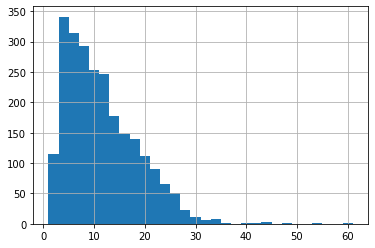

In [30]:
# Get length of all the messages in the data set
seq_len = [len(i.split()) for i in df.Sentence]
pd.Series(seq_len).hist(bins = 30)

In [36]:
maxlength = df['Sentence'].str.split().str.len().max()
print("The maximum length in words are : " +  str(maxlength)) 

The maximum length in words are : 61


In [37]:
dtypes=pd.DataFrame(df.dtypes,columns=["Data Type"])
dtypes["Unique Values"]=df.nunique()
dtypes["Null Values"]=df.isnull().sum()
dtypes["% null Values"]=df.isnull().sum()/len(df)
dtypes.style.background_gradient(cmap='Set2',axis=0)

,Data Type,Unique Values,Null Values,% null Values
Sentence,object,2382,0,0.000000
Polarity,int64,2,0,0.000000


<Figure size 504x360 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Polarities')

Text(0.5, 0, 'Polarities')

Text(0, 0.5, 'Count')

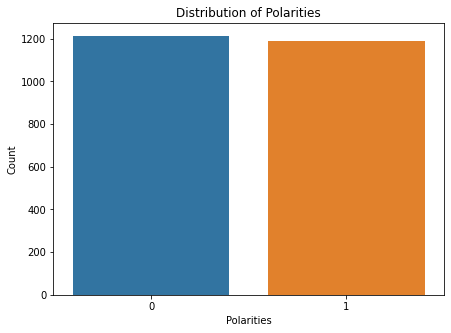

In [26]:
plt.figure(figsize=(7,5))

d=sns.countplot(data = df, x = 'Polarity')

plt.title('Distribution of Polarities')
plt.xlabel('Polarities')
plt.ylabel('Count')

In [13]:
# DO NOT MODIFY THIS CELL

# Next, we'll split it into training and test
from sklearn.model_selection import train_test_split

X = df['Sentence']
y = df['Polarity']

# So that we can evaluate how well our model is performing, we split our training data
# into training and validation.

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

## Part 1.a: Preprocessing and FE Pipeline

Clean and preprocess the data (i.e., `X_train`) as you see necessary. Extract features from the text (i.e., vectorization using BOW and/or Bag of N-Grams and/or topics and/or lexical features). 


In [14]:
# TODO: insert code here 
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1800,)
(1800,)
(600,)
(600,)


In [15]:
%time vectorizer = TfidfVectorizer()

#vectorizer = CountVectorizer(min_df=.01, max_df=.8, ngram_range=[1,4], max_features=550)
#vectorizer = TfidfVectorizer(max_features = 1500, ngram_range=[1,7])

CPU times: user 35 µs, sys: 7 µs, total: 42 µs
Wall time: 47.2 µs


## Part 1.b: Model Training/Tuning/Cross Validation

Use your favorite shallow ML algorithm (such as decision trees, KNN, random forest, boosting variants) to train a classification model.  Don’t forget everything we’ve learned in the machine learning course: hyperparameter tuning, cross-validation, handling imbalanced data, etc. Make reasonable decisions and try to create the best-performing model that you can.


In [16]:
# TODO: insert code here 

#model = XGBClassifier()
#model = RandomForestClassifier(random_state=223)
#model = CatBoostClassifier()

model = MultinomialNB()

pipe = Pipeline([('vec', vectorizer),  ('clf', model)])

pipe.fit(X_train, y_train)

Pipeline(steps=[('vec', TfidfVectorizer()), ('clf', MultinomialNB())])

In [17]:
pred_val = pipe.predict(X_val)
print(confusion_matrix(y_val, pred_val))
print(classification_report(y_val, pred_val))

[[270  53]
 [ 59 218]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       323
           1       0.80      0.79      0.80       277

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600



## Part 1.c: Model Assessment 

Use your model to predict the sentiment of the testing data. Measure the performance (e.g., accuracy, AUC, F1-score) of your model. 

In [18]:
# DO NOT MODIFY THIS CELL

test_df = pd.read_csv("https://drive.google.com/uc?export=download&id=1taoTluPBUMt9JkKAnlqDTrU49DJFpJGW")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  600 non-null    object
 1   Polarity  600 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ KB


In [19]:
# TODO: insert code here 
#%time test_df['Sentence'] = test_df['Sentence'].apply(preprocess)
test_df.head(15)

,Sentence,Polarity
0,A good commentary of today's love and undoubte...,1
1,For people who are first timers in film making...,1
2,"It was very popular when I was in the cinema, ...",1
3,It's a feel-good film and that's how I felt wh...,1
4,It has northern humour and positive about the ...,1
5,I rather enjoyed it.,1
6,I liked it.,1
7,I couldn't take them seriously.,0
8,It really created a unique feeling though.,1
9,Vivian Schilling did an excellent job with the...,1


In [20]:
y_test = test_df['Polarity']
X_test = test_df['Sentence']
pred_test = pipe.predict(test_df['Sentence'])
print(confusion_matrix(y_test, pred_test))
print(classification_report(y_test, pred_test))

[[245  42]
 [ 93 220]]
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       287
           1       0.84      0.70      0.77       313

    accuracy                           0.78       600
   macro avg       0.78      0.78      0.77       600
weighted avg       0.78      0.78      0.77       600



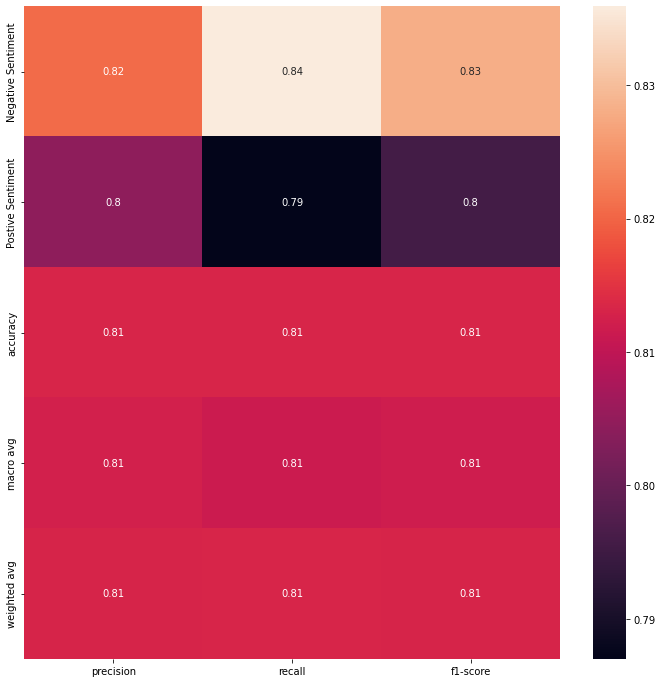

In [21]:
def visualize_classification_report_with_heatmap(y_test, pred_test, target_names_dict):
  fig, ax = plt.subplots(figsize=(12,12)) 
  clf_report = classification_report(y_test, pred_test,
                                    target_names=list(target_names_dict.values()),
                                    output_dict=True)
  sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
  return

# Use this dict, if cannot generate from labeled data based dictionary ('label_dict') dynamically
label_dict_fixed={0: 'Negative Sentiment',1: 'Postive Sentiment' }

visualize_classification_report_with_heatmap(y_val, pred_val, label_dict_fixed)

In [22]:
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss

print("Accuracy = {:.2f}".format(accuracy_score(y_test, pred_test)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, pred_test)))
print("F1 Score = {:.2f}".format(f1_score(y_test, pred_test)))
print("Log Loss = {:.2f}".format(log_loss(y_test, pred_test)))

Accuracy = 0.78
Kappa = 0.55
F1 Score = 0.77
Log Loss = 7.77


In [ ]:
test_df['Predicted labels'] = pred_test
test_df['Match'] = pd.NaT


for index, row in test_df.iterrows():
  if row["Polarity"] == row["Predicted labels"]:
    test_df.at[index, ["Match"]] = "Right Prediction"
  elif row["Polarity"] != row["Predicted labels"]:
    test_df.at[index, ["Match"]] = "Wrong Prediction"

prediction = ['Wrong Prediction']
test_df[test_df['Match'].isin(prediction)]

,Sentence,Polarity,Predicted labels,Match
3,feelgood film thats felt came cinema,1,0,Wrong Prediction
14,would casted role ready script,1,0,Wrong Prediction
20,blew,0,1,Wrong Prediction
21,movie excellentangel beautiful scamp adorableh...,1,0,Wrong Prediction
26,wish could enter negative value admins,0,1,Wrong Prediction
...,...,...,...,...
572,act film glad youre gonna drift away earth far...,0,1,Wrong Prediction
581,keep watching,1,0,Wrong Prediction
582,sad movie good,1,0,Wrong Prediction
583,seen movie definitely recommend,1,0,Wrong Prediction


In [ ]:
my_submission = pd.DataFrame({'Sentence': test_df['Sentence'], 'Polarity': test_df['Polarity'],'Predicted labels': test_df['Predicted labels'], 'Match': test_df['Match'] })
print(my_submission.head())

                                            Sentence  Polarity  \
0  good commentary today love undoubtedly film wo...         1   
1  people first timer film making think excellent...         1   
2  popular cinema good house good reaction plenty...         1   
3               feelgood film thats felt came cinema         1   
4      northern humour positive community represents         1   

   Predicted labels             Match  
0                 1  Right Prediction  
1                 1  Right Prediction  
2                 1  Right Prediction  
3                 0  Wrong Prediction  
4                 1  Right Prediction  


In [ ]:
# NOTE: after saving the CSV file, be sure to zip the file before submitting to the competition website!
my_submission.to_csv('Answers.csv', index=False)

## Part 2: Given the performance of your model, are you satisfied with the results? Explain.

Keep your response to 1000 characters or less.

TODO: Insert answer here.

## Part 3: Show five test instances in which your model was incorrect. Dive deep and find out why your model was wrong.

Keep your response to 1000 characters or less.

Insert answer here. (Feel free to create new code cells if necessary.)

# Question 2 (Optional): Sentiment Analysis via Deep ML

This question is optional and worth up to 5 extra credit marks.

Use deep learning (e.g., RNNs and variants, CNNs and variants, and/or transformers) to build a model on the same dataset and compare the results with the Shallow ML model.

You may train your own deep ML model (using, e.g., the keras library) or use a pre-trained deep ML model (using, e.g., the transformers library).

In [ ]:
from transformers import TFDistilBertForSequenceClassification, DistilBertTokenizer
import tensorflow as tf

In [ ]:
X = df['Sentence'].tolist()
y = df['Polarity'].tolist()

# So that we can evaluate how well our model is performing, we split our training data
# into training and validation.

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

In [ ]:
# TODO: Insert code here.
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

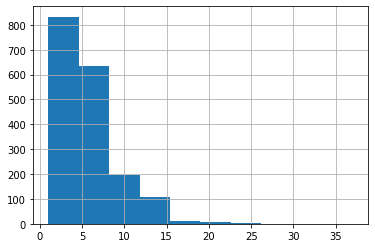

In [ ]:
seq_len = [len(i.split()) for i in X_train]

pd.Series(seq_len).hist(bins = 10)

In [ ]:
def encode_text(text):
    max_length= 28
    dbert_inputs = tokenizer(text,max_length =max_length,
                            truncation=True, 
                            add_special_tokens=True, 
                            padding=True)


    return dbert_inputs
train_encodings = encode_text(X_train)   
val_encodings = encode_text(X_val)

In [ ]:
def create_dataset(encoding, label):
    dataset = tf.data.Dataset.from_tensor_slices((
    dict(encoding),
    label))

    return dataset

train_dataset = create_dataset(train_encodings, y_train)
val_dataset = create_dataset(val_encodings, y_val)

In [ ]:
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

optimizer = tf.keras.optimizers.RMSprop(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])
model.summary()

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['activation_13', 'vocab_projector', 'vocab_layer_norm', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_59', 'pre_classifier', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

Model: "tf_distil_bert_for_sequence_classification_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMai  multiple                 66362880  
 nLayer)                                                         
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_59 (Dropout)        multiple                  0         
                                                                 
Total params: 66,955,010
Trainable params: 66,955,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_dataset.shuffle(len(train_dataset)).batch(10), epochs=10, batch_size=32,
          validation_data=val_dataset.shuffle(len(val_dataset)).batch(10))

Epoch 1/10
180/180 [==============================] - 26s 81ms/step - loss: 0.4378 - accuracy: 0.7944 - val_loss: 0.4003 - val_accuracy: 0.8367
Epoch 2/10
180/180 [==============================] - 13s 72ms/step - loss: 0.2634 - accuracy: 0.8950 - val_loss: 0.3925 - val_accuracy: 0.8417
Epoch 3/10
180/180 [==============================] - 12s 66ms/step - loss: 0.1307 - accuracy: 0.9533 - val_loss: 0.5971 - val_accuracy: 0.7967
Epoch 4/10
180/180 [==============================] - 12s 66ms/step - loss: 0.0709 - accuracy: 0.9789 - val_loss: 0.6182 - val_accuracy: 0.8417
Epoch 5/10
180/180 [==============================] - 12s 66ms/step - loss: 0.0530 - accuracy: 0.9844 - val_loss: 0.7556 - val_accuracy: 0.8483
Epoch 6/10
180/180 [==============================] - 12s 65ms/step - loss: 0.0369 - accuracy: 0.9878 - val_loss: 0.8130 - val_accuracy: 0.8550
Epoch 7/10
180/180 [==============================] - 12s 65ms/step - loss: 0.0239 - accuracy: 0.9933 - val_loss: 0.9642 - val_accuracy:

In [ ]:
output_val = model.predict(val_dataset)
pred_labels_val = np.argmax(output_val.logits, axis=1)

In [ ]:
pred_labels_val

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,

In [ ]:
pred_test = test_df['Sentence'].to_list()
text_encodings = encode_text(pred_test)
text_ds = tf.data.Dataset.from_tensor_slices((
    dict(text_encodings)))
output = model.predict(text_ds)
pred_labels = np.argmax(output.logits, axis=1)
pred_labels

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,

In [ ]:
print(confusion_matrix(y_test, pred_labels))
print(classification_report(y_test, pred_labels))

[[250  37]
 [ 48 265]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       287
           1       0.88      0.85      0.86       313

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600



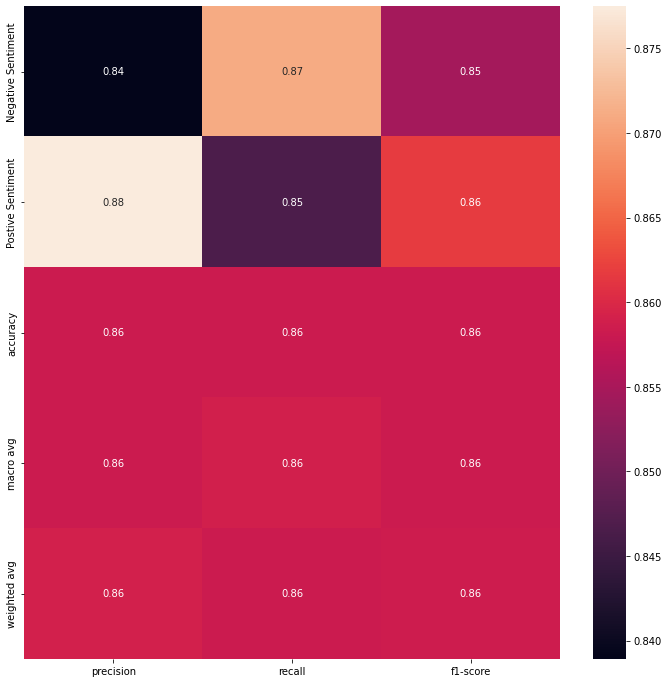

In [ ]:
visualize_classification_report_with_heatmap(y_test, pred_labels, label_dict_fixed)

In [ ]:
test_df['Predicted labels'] = pred_labels
test_df['Match'] = pd.NaT

for index, row in test_df.iterrows():
  if row["Polarity"] == row["Predicted labels"]:
    test_df.at[index, ["Match"]] = "Right Prediction"
  elif row["Polarity"] != row["Predicted labels"]:
    test_df.at[index, ["Match"]] = "Wrong Prediction"

prediction = ['Wrong Prediction']
test_df[test_df['Match'].isin(prediction)]

,Sentence,Polarity,Predicted labels,Match
10,world better garbage theatre today,1,0,Wrong Prediction
12,screamy masculine right,1,0,Wrong Prediction
14,would casted role ready script,1,0,Wrong Prediction
34,setting,0,1,Wrong Prediction
36,soundtrack wasnt terrible either,1,0,Wrong Prediction
...,...,...,...,...
566,track command sentiment actually contributing ...,1,0,Wrong Prediction
572,act film glad youre gonna drift away earth far...,0,1,Wrong Prediction
581,keep watching,1,0,Wrong Prediction
582,sad movie good,1,0,Wrong Prediction
